<a href="https://colab.research.google.com/github/ChenChiehTu/DeepLearningHW/blob/main/HW4_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb

##### Copyright 2019 The TensorFlow Authors.
"""

"""# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.

### Import TensorFlow
"""

import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

"""### Download and prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
The dataset is divided into 50,000 training images and 10,000 testing images.
The classes are mutually exclusive and there is no overlap between them.
"""


'### Download and prepare the CIFAR10 dataset\n\nThe CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. \nThe dataset is divided into 50,000 training images and 10,000 testing images. \nThe classes are mutually exclusive and there is no overlap between them.\n'

# 將要執行的影像分類 ii=1: 物品分類 ii=2: 服飾分類 ii=3 數字分類

11490434/11490434 [==============================] - 0s 0us/step


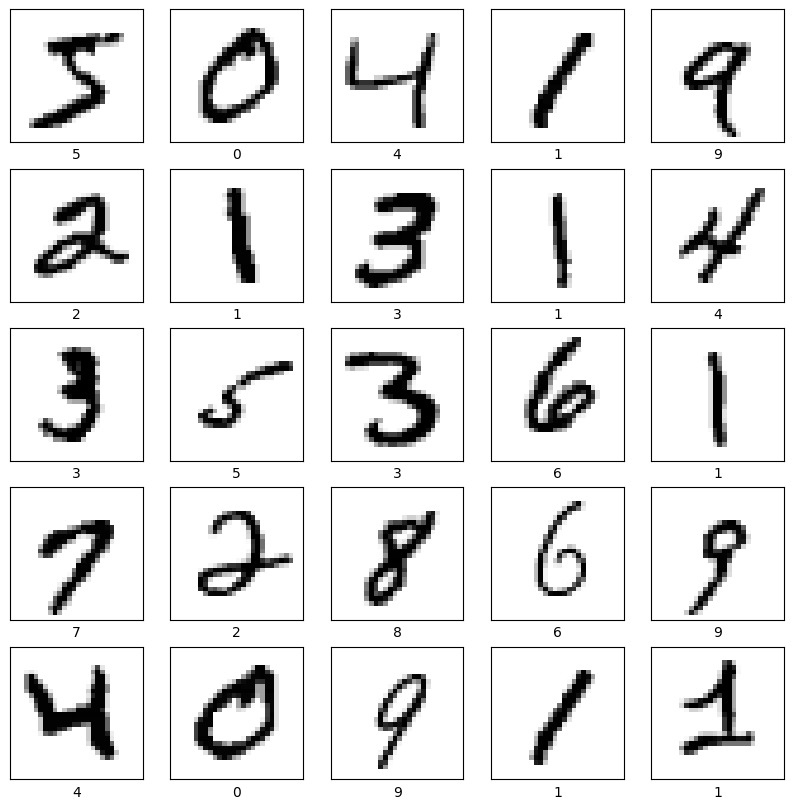

In [7]:
ii = 3

if ii == 1:
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i])
        # The CIFAR labels happen to be arrays,
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    input_size = 32
    input_shape = (32, 32, 3)

if ii == 2:
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    """### Verify the data

    To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

    """
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays,
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i]])
    plt.show()
    input_size = 28
    input_shape = (28, 28, 1)

if ii == 3:
  mnist_dataset = tf.keras.datasets.mnist
  (train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()
  class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']


  plt.figure(figsize=(10, 10))
  for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays,
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i]])
  plt.show()
  input_size = 28
  input_shape = (28, 28, 1)


Normalize pixel values to be between 0 and 1

In [9]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size.
If you are new to these dimensions, color_channels refers to (R,G,B).
In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.
You can do this by passing the argument `input_shape` to your first layer.


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(input_size, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2*input_size, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2*input_size, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
Total params: 42728 (166.91 KB)
Trainable params: 4272

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).
The width and height dimensions tend to shrink as you go deeper in the network.
The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  
as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification.
Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.
First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top.
CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

"""Here's the complete architecture of your model:"""

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)              

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

# Compile and train the model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1512 - accuracy: 0.9539 - val_loss: 0.0490 - val_accuracy: 0.9846
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0457 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0336 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0243 - val_accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0305 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0297 -

# Evaluate the model

313/313 - 3s - loss: 0.0282 - accuracy: 0.9922 - 3s/epoch - 9ms/step
0.9922000169754028


'Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! \nFor another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.'

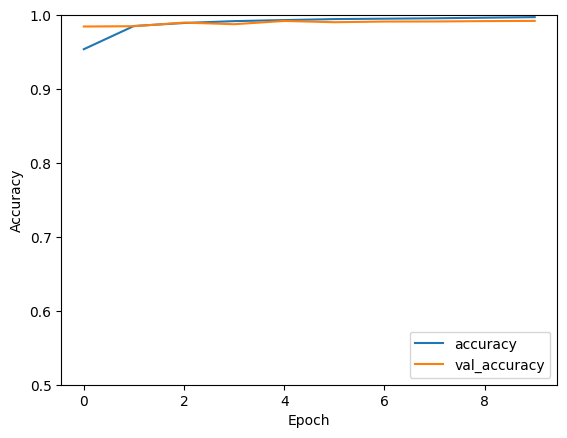

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

"""Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code!
For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`."""


# Predictions using my images

Upload images to validate this model

In [15]:
from google.colab import files

uploaded = files.upload()

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg


Define ploting functions

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

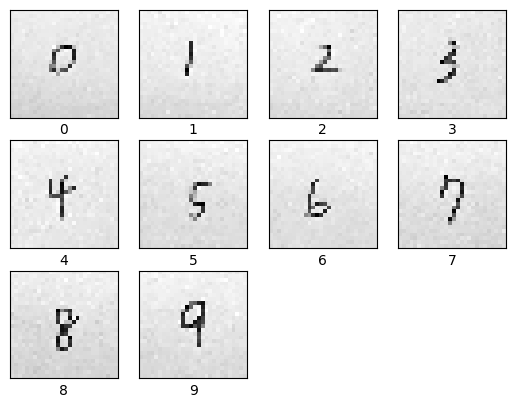

In [31]:
import matplotlib.image as mpimg
import cv2
import numpy as np
if ii == 2:
  Testimages = ['Tshirt.jpg', 'Trouser.jpg', 'Pullover.jpg', "Dress.jpg", 'Coat.jpg', 'Sandal.jpg', 'Shirt.jpg', 'Sneaker.jpg', 'Bag.jpg', 'Ankle boot.jpg']
if ii == 3:
  Testimages = ['0.jpg', '1.jpg', '2.jpg', "3.jpg", '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
true_test_labels = np.array([0, 1, 2 ,3, 4, 5, 6, 7, 8, 9])
for i in range(10):
    plt.subplot(3, 4, i+1)
    image = []
    image = mpimg.imread(Testimages[i])
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image_array = np.empty((10, *image.shape), dtype=image.dtype)
    # image_array[i] = 255.0-image

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_array[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()

In [32]:
probability_model = tf.keras.Sequential([model,
           tf.keras.layers.Softmax()])

predict = probability_model.predict(image_array)

1/1 [==============================] - 0s 89ms/step


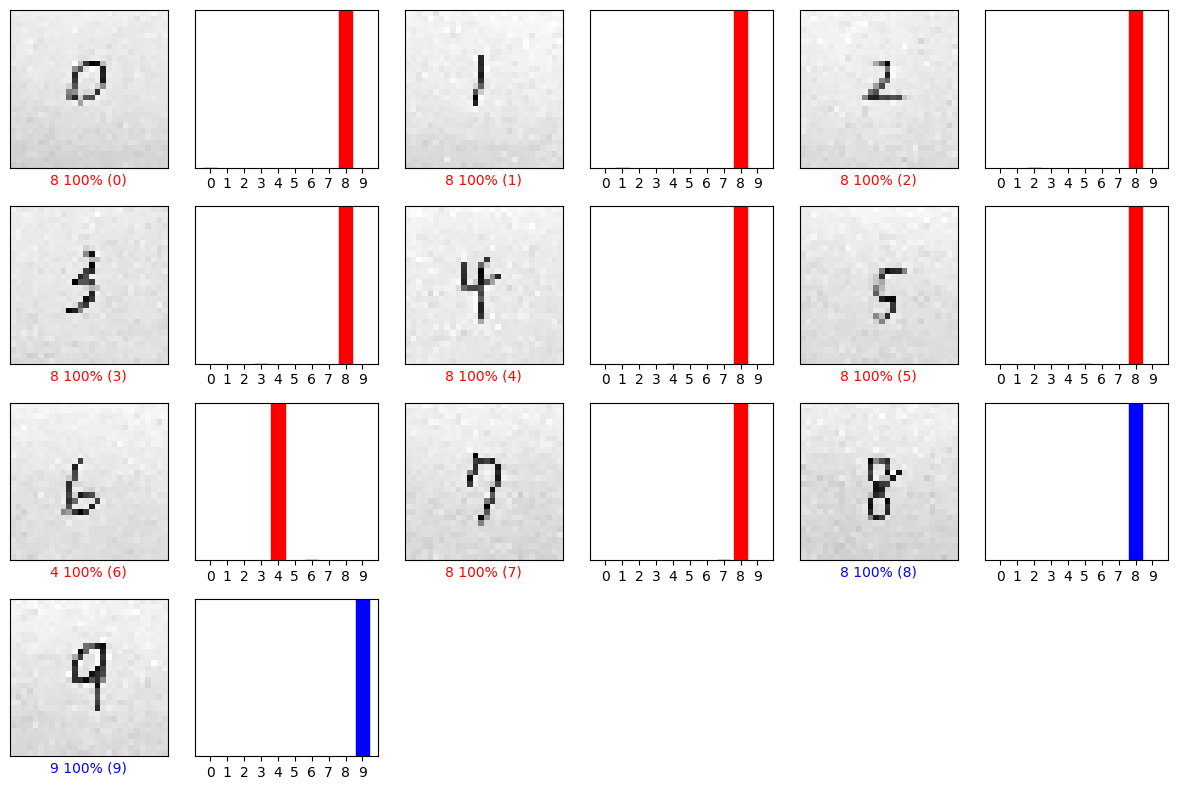

In [33]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols-2
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predict[i], true_test_labels, image_array)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predict[i], true_test_labels)
plt.tight_layout()
plt.show()